# 성능 평가 지표(evaluation metric) : 분류/회귀 </br>
회귀 : 에측 오차를 가지고 정규화 수준을 재가공 </br>
분류 : 이진 분류의 성능 평가 지표</br>
분류의 성능 평가 지표 : accuracy, confusion matrix, precision, recall, f1 score, ROC AUC

BaseEstimator. sklearn. base. BaseEstimator is a base class in the scikit-learn machine learning library that defines the basic interface for all estimators in scikit-learn.

In [7]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    # predict() 메서드는 단순히 sex 피처가 1이면 0, 그렇지 않으면 1로 예측함
    def predict(self, X) :
        # 행의 수와 열의 수가 각각 X의 행의 수와 1인 2차원 배열을 생성하여 0으로 초기화
        pred = np.zeros((X.shape[0],1)) # zeros() function returns a new array of given shape and type, where the element's value as 0.
        for i in range(X.shape[0]) :
            if X['Sex'].iloc[i] ==1:
                pred[i] = 0
            else :
                pred[i] = 1
        return pred
        


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
데이터 세트 NULL 값 개수 0
Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 cabin 값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34  

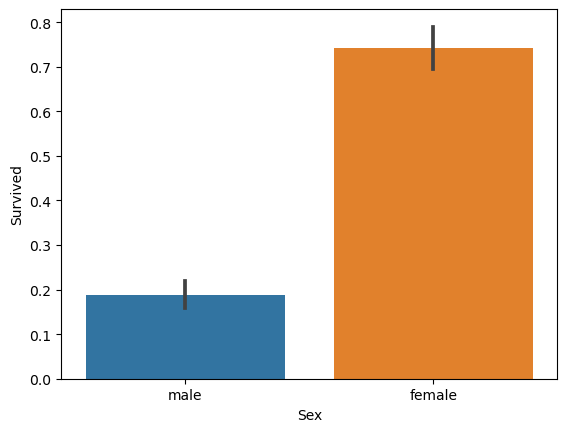

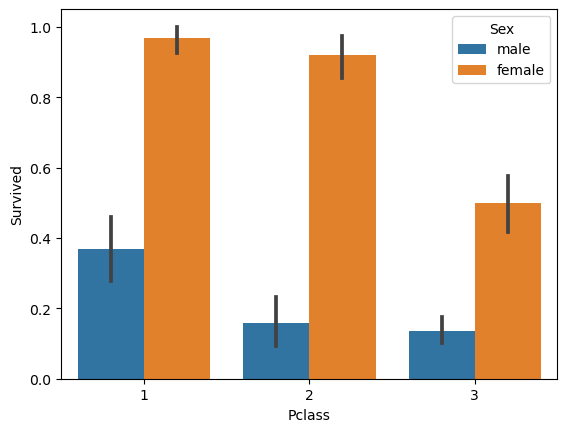

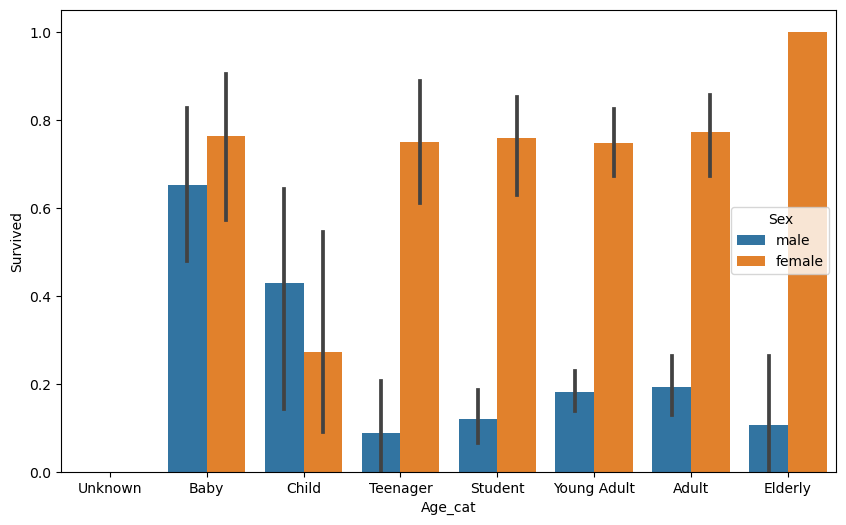

DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegrssion 정확도 : 0.8659
교차 검증 0 정확도 : 0.7542
평균 정확도:0.7542
교차 검증 1 정확도 : 0.7809
평균 정확도:0.7675
교차 검증 2 정확도 : 0.7865
평균 정확도:0.7739
교차 검증 3 정확도 : 0.7697
평균 정확도:0.7728
교차 검증 4 정확도 : 0.8202
평균 정확도:0.7823
교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도: 0.7879
GridSearchCV 최적의 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


In [12]:
%run 2-6_titanic_scikit.ipynb

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# from 2-6_titanic_scikit import *

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('dataset/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classfier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classfier의 정확도는: 0.7877


In [15]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y): # self : 현재 작업중인 인스턴스
        pass
    
    # 입력값으로 들어오는 x 데이터세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X) : 
        return np.zeros((len(X),1), dtype=bool)
    
# 사이킷런의 내장 데이터 세트인 load_digits()을 이용해 MNIST 데이터 로딩    
digits = load_digits()

# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환.
y = (digits.target ==7).astype(int) # astype(int) : 정수형으로 변환
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=1)


In [17]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기:',y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train,y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는 : {:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    402
1     48
dtype: int64
모든 예측을 0으로 하여도 정확도는 : 0.893


결론 : 단지 모든 것을 0으로만 예측해도 MyFakeClassifier의 정확도가 90퍼라는 건 말이 안됨</br>
따라서 정확도와 더불어 다른 평가 요소 지표들도 활용해야함.